In [1]:
import pandas as pd

df= pd.read_csv("stocks.csv")

df.head()


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ALTA3,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ALTA3,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ALTA3,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ALTA3,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ALTA3,124.85,129.51,120.17,124.08,4461424.71


In [2]:
df.loc[0, "Date"]


'2020-03-13 08-PM'

In [3]:
df.loc[0, "Date"].day_name() # THIS WILL CAUSE AN ERROR!


AttributeError: 'str' object has no attribute 'day_name'

In [4]:
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %I-%p')


In [5]:
df["Date"]


0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [6]:
df.loc[0, "Date"].day_name()


'Friday'

In [7]:
import pandas as pd
from datetime import datetime

# `timelord` is set to equal a lambda function, which is a shorthand function
# what it will do is pass each string in the "date" column against the datetime.strptime method 
# and the format string we already made
timelord= lambda eachdatestr: datetime.strptime(eachdatestr, "%Y-%m-%d %I-%p")

df= pd.read_csv("stocks.csv", parse_dates=["Date"], date_parser=timelord)

df.head()


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ALTA3,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ALTA3,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ALTA3,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ALTA3,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ALTA3,124.85,129.51,120.17,124.08,4461424.71


In [8]:
# the "Date" column is entirely datetime data, so we can use the "dt" method against it
df["Date"].dt.day_name()


0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [9]:
df["Week Day"]= df["Date"].dt.day_name()
df


,Date,Symbol,Open,High,Low,Close,Volume,Week Day
0,2020-03-13 20:00:00,ALTA3,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ALTA3,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ALTA3,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ALTA3,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ALTA3,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ALTA3,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ALTA3,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ALTA3,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ALTA3,275.01,275.01,271.00,274.83,824362.87,Saturday


In [10]:
df["Date"].min()


Timestamp('2017-07-01 11:00:00')

In [11]:
df["Date"].max()


Timestamp('2020-03-13 20:00:00')

In [12]:
df["Date"].max() - df["Date"].min()


Timedelta('986 days 09:00:00')

In [13]:
filt= df["Date"] >= "2020"
# this will create a range of true/false values for the "Date" column-- 
# these can then be compared against our dataframe with .loc()
df.loc[filt]


,Date,Symbol,Open,High,Low,Close,Volume,Week Day
0,2020-03-13 20:00:00,ALTA3,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ALTA3,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ALTA3,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ALTA3,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ALTA3,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
1744,2020-01-01 04:00:00,ALTA3,129.57,130.00,129.50,129.56,702786.82,Wednesday
1745,2020-01-01 03:00:00,ALTA3,130.37,130.44,129.38,129.57,496704.23,Wednesday
1746,2020-01-01 02:00:00,ALTA3,130.14,130.50,129.91,130.37,396315.72,Wednesday
1747,2020-01-01 01:00:00,ALTA3,128.34,130.14,128.32,130.14,635419.40,Wednesday


In [14]:
filt2= (df["Date"] >= pd.to_datetime("2019-01-01")) & (df["Date"] < pd.to_datetime("2019-02-01"))
df.loc[filt2]


,Date,Symbol,Open,High,Low,Close,Volume,Week Day
9765,2019-01-31 23:00:00,ALTA3,106.24,106.24,105.53,105.79,154196.70,Thursday
9766,2019-01-31 22:00:00,ALTA3,105.75,106.35,105.61,106.24,287372.14,Thursday
9767,2019-01-31 21:00:00,ALTA3,106.23,106.23,105.64,105.75,329152.63,Thursday
9768,2019-01-31 20:00:00,ALTA3,105.71,106.25,105.49,106.23,460235.89,Thursday
9769,2019-01-31 19:00:00,ALTA3,105.11,105.84,105.05,105.71,440680.10,Thursday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ALTA3,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ALTA3,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ALTA3,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ALTA3,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [15]:
df.set_index("Date", inplace=True)
df


,Symbol,Open,High,Low,Close,Volume,Week Day
Date,,,,,,,
2020-03-13 20:00:00,ALTA3,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ALTA3,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ALTA3,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ALTA3,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ALTA3,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ALTA3,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ALTA3,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ALTA3,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [16]:
df.loc["2019"]


,Symbol,Open,High,Low,Close,Volume,Week Day
Date,,,,,,,
2019-12-31 23:00:00,ALTA3,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ALTA3,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ALTA3,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ALTA3,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ALTA3,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ALTA3,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ALTA3,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ALTA3,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [17]:
df.loc["2020-01":"2020-03"]


,Symbol,Open,High,Low,Close,Volume,Week Day
Date,,,,,,,
2020-03-13 20:00:00,ALTA3,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ALTA3,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ALTA3,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ALTA3,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ALTA3,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ALTA3,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ALTA3,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ALTA3,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [18]:
df.loc["2020-01":"2020-03"]["Close"].mean()


197.56875929102344

In [19]:
df.loc["2020-01"]["High"]



Date
2020-01-31 23:00:00    181.73
2020-01-31 22:00:00    182.24
2020-01-31 21:00:00    181.04
2020-01-31 20:00:00    180.51
2020-01-31 19:00:00    179.57
                        ...  
2020-01-01 04:00:00    130.00
2020-01-01 03:00:00    130.44
2020-01-01 02:00:00    130.50
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.54
Name: High, Length: 744, dtype: float64

In [20]:
df.loc["2020-01"]["High"].max()


186.89

In [21]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

# df["High"].resample("2D") <-- this would sample every other day
# df["High"].resample("W") <-- this would sample every week
# df["High"].resample("3W") <-- this would sample every three weeks

# return the max value of "High" for every 24 hour period!
highs= df["High"].resample("D").max()
highs


Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
2017-07-05    274.97
               ...  
2020-03-09    208.65
2020-03-10    206.28
2020-03-11    202.98
2020-03-12    195.64
2020-03-13    148.00
Freq: D, Name: High, Length: 987, dtype: float64

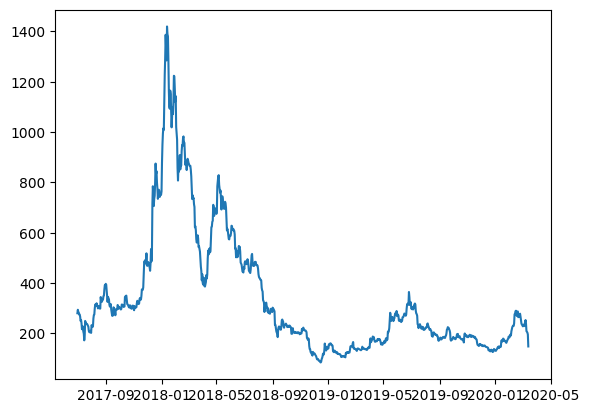

In [22]:
from matplotlib import pyplot as plt

plt.plot(highs)
plt.show()
